# Clustering
* Clustering is the grouping of data showing similar characteristics in a data set.
* It is an unsupervised learning method.

## K - Means Clustering 
* It means dividing a data set of N data objects into K sets given as input parameters
* The K Means algorithm tries to detect K clusters that will make the squared error the lowest.
* The algorithm basically consists of 4 stages.
   1. Determination of cluster centers
   2. Clustering data outside the center according to their distance.
   3. Identifying new centers or shifting old centers to new centers according to the clustering.
   4. Repeating 2nd and 3rd walks until stable.


In [1]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# create dataset

# cluster 1
x1 = np.random.normal(25,5,1000) # At 25, there are 1000 points with a standard deviation of 5.
y1 = np.random.normal(25,5,1000)

# cluster 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# cluster 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3), axis = 0)
y = np.concatenate((y1,y2,y3), axis = 0)

dictionary = {"x":x, "y":y}
data = pd.DataFrame(dictionary)
data.head()

,x,y
0,32.954649,27.643159
1,28.086297,22.535851
2,19.111868,24.143621
3,28.224516,16.731210
4,36.031569,26.152305


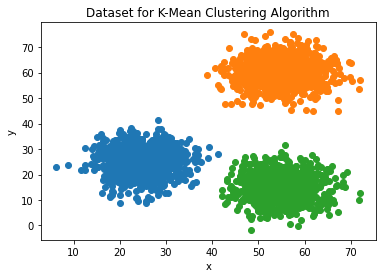

In [3]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset for K-Mean Clustering Algorithm")
plt.show()

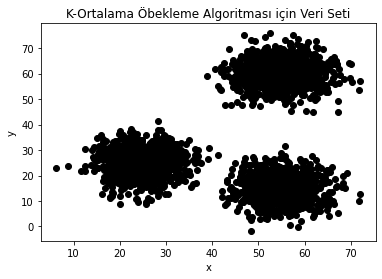

In [4]:
# k means algorithm will see the data like this
plt.figure()
plt.scatter(x1,y1, color = "black")
plt.scatter(x2,y2, color = "black")
plt.scatter(x3,y3, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Öbekleme Algoritması için Veri Seti")
plt.show()


* Finding the Best K Value
* what is the # Elbow method?

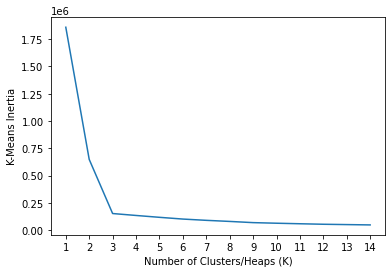

In [5]:
from sklearn.cluster import KMeans

# # Elbow method

variable = []

for k in range(1,15):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(data)
  variable.append(kmeans.inertia_)


plt.figure()  
plt.plot(range(1,15), variable)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters/Heaps (K)")
plt.ylabel("K-Means Inertia")
plt.show()

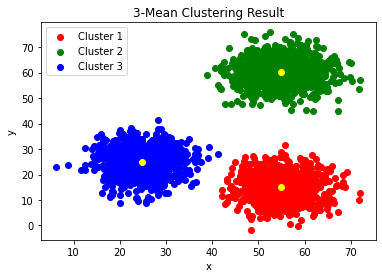

In [6]:
k_means = KMeans(n_clusters = 3)
clusters = k_means.fit_predict(data)

data["label"] = clusters

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = "red", label = "Cluster 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = "green", label = "Cluster 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = "blue", label = "Cluster 3")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], color = "yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Mean Clustering Result")
plt.show()


## Hierarchical Clustering
* Hierarchical clustering is a cluster analysis method that attempts to construct a cluster hierarchy.
* Hierarchical clustering strategies are generally divided into 2 types.
   1. Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and as it moves up its steps, pairs of clusters converge.
   2. Divider: This is a "top down" approach: all observations begin in a single cell, and divisions are performed iteratively as they work their way down the processes.

In [7]:
# create dataset

# cluster 1
x1 = np.random.normal(25,5,20) # At 25, there are 1000 points with a standard deviation of 5.
y1 = np.random.normal(25,5,20)

# cluster 2
x2 = np.random.normal(55,5,20)
y2 = np.random.normal(60,5,20)

# cluster 3
x3 = np.random.normal(55,5,20)
y3 = np.random.normal(15,5,20)

x = np.concatenate((x1,x2,x3), axis = 0)
y = np.concatenate((y1,y2,y3), axis = 0)

dictionary = {"x":x, "y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,29.801609,28.279356
1,25.178424,19.796770
2,27.021191,27.326619
3,23.133912,20.494177
4,26.120279,23.635511


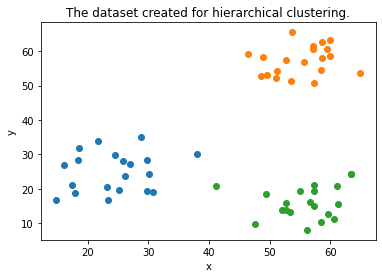

In [8]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("The dataset created for hierarchical clustering.")
plt.show()

### Dendrogram Representation.

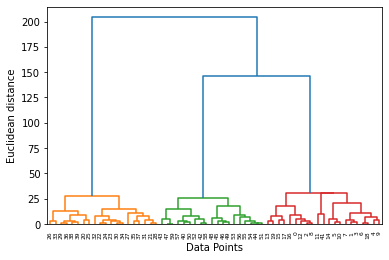

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("Data Points")
plt.ylabel("Euclidean distance")
plt.show()

* Based on the resulting figure, if we make a cut from the longest leaves, we can see that we have 3 clusters. Therefore, when training the hierarchical clustering method, 3 clusters are created.

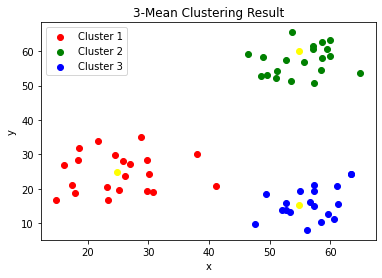

In [10]:
from sklearn.cluster import AgglomerativeClustering 

hierarchy_cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
clusters = hierarchy_cluster.fit_predict(data)

data["label"] = clusters

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = "red", label = "Cluster 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = "green", label = "Cluster 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = "blue", label = "Cluster 3")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], color = "yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Mean Clustering Result")
plt.show()